## Alpha-beta pruning 



*Alpha-beta pruning* serves as an enhancement to the *minimax* algorithm, which is commonly employed in the realm of two-person games like tic-tac-toe, checkers, chess, and Go, where game trees are a central component of strategy evaluation.

A game tree comprehensively encompasses all potential moves and outcomes within a game, and it can often be exceptionally vast or even theoretically infinite in scope. Each distinct game state corresponds to a node within this tree structure, with the root node representing the initial state. As players make their moves, each possible play traces a path or branch within the game tree, ultimately culminating in a terminal node, signifying the conclusion of the game.

To determine the optimal move in this complex web of possibilities, it is essential to employ an evaluation function capable of ascribing *values* to these nodes. The player who takes the first turn aspires to reach a terminal node with the highest value, while their opponent seeks to achieve the opposite objective. This back-and-forth dynamic continues as the players alternate their moves in the pursuit of strategic victory.

Moving forward, we'll designate the player taking the first move as the *maximizer*, while the other player will be referred to as the *minimizer*.



In [1]:
try:
  from alpha_beta import * # type: ignore
except ImportError:
  url = 'https://raw.githubusercontent.com/jhjeong314/CS_Math/main/alpha_beta_pruning'
  import httpimport
  with httpimport.remote_repo(url):
    from alpha_beta import * # type: ignore

Let's consider a very simple game for illustrative purposes, which is depicted in the diagram below:

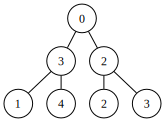

In [2]:
dot_data = '''graph {
  node [width=.4 height=.4 fixedsize=true fontsize=12];
  nodesep=0.2;
  ranksep=0.2;

  root [label="0"];
  0 [label="3"];
  00 [label="1"];
  01 [label="4"];
  1 [label="2"];
  10 [label="2"];
  11 [label="3"];

  root -- {0 1};
  0 -- {00 01};
  1 -- {10 11};
}
'''
graph = graphviz.Source(dot_data)
display(graph)

In this graphical representation, the numbers associated with each node represent their respective values. To facilitate our discussion, we can assign a unique tree-index to each node according to the following scheme:

- The root node: identified as an empty string.
- The left child of the root: identified as 0.
- The right child of the root: identified as 1.
- The left child of the node with tree-index 0: identified as 00.
- The right child of the node with tree-index 0: identified as 01.
- The left child of the node with tree-index 1: identified as 10.
- The right child of the node with tree-index 1: identified as 11.

It is clear that this systematic method allows us to assign tree-indices to all nodes within an arbitrarily extensive tree structure.

### 1. Minimax algorithm

Now, for the first move, the maximizer faces a choice between node 0 (with a value of 3) and node 1 (with a value of 2).

If the maximizer opts for the larger value of 3, the minimizer will undoubtedly select node 00, which has a value of 1. However, should the maximizer go for the initially smaller value of 2, the minimizer will seize node 10, possessing a value of 2, which is bigger than the other terminal value 1.

Therefore, the optimal decision for the maximizer is to select node 1 (with a value of 2). This choice aligns with the maximizer's overarching strategy, which involves maximizing the minimum value among its potential moves—hence the term *minimax*.

This principle holds true not only for game trees with a height of 2 but, encouragingly, extends to game trees of arbitrary height. We can substantiate this fact rigorously by employing an inductive approach based on the tree's height.

It's essential to emphasize that, within this strategy, the values assigned to internal nodes are inconsequential. Only the values at terminal nodes hold significance. To facilitate our comprehension of the search algorithm, we will operate under the assumption that we can readily evaluate the value at any node, even those located at a considerable distance from the root.

In our second example, the game tree has a depth of 3. Consequently, the maximizer has the opportunity to make two moves, whereas the minimizer makes only one move.

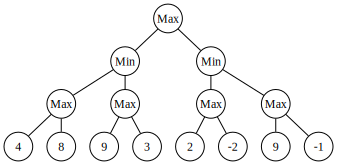

In [3]:
list1 = [4,8,9,3,2,-2,9,-1]
root = build_bin_tree(list1)
root.draw_tree() # same as root.draw_tree(True)

As illustrated in the diagram above, the values are initially assigned to the terminal nodes. Meanwhile, for the internal nodes, those attributed to the maximizer are labeled as `Max`, while those assigned to the minimizer are denoted as `Min`.

(8, [0, 0, 1])


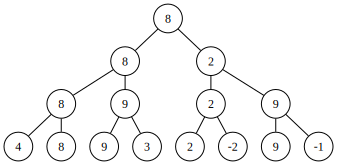

In [4]:
# When we apply the minimax algorithm to above, we get the following result:

print(minimax(root, True))
root.draw_tree()

The maximizer achieves a result of 8 through the minimax algorithm. The *path*, which represents the sequence of moves leading to this result, can be expressed as [0, 0, 1]. To succinctly convey this information, the text output is presented as (8, [0, 0, 1]).

In our implementation, we traverse the tree nodes in postorder because we can evaluate a node only after all of its children have been evaluated.

Node 00 is evaluated as 8 because max(4,8) = 8.  Node 01 is evaluated as 9 because max(9,3) = 9.  Node 0 is evaluated as 8 because Min(8,9) = 8. We can continue this way to evaluate all nodes.

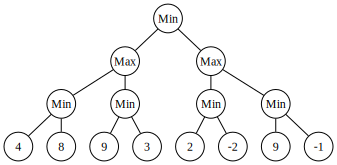

In [5]:
# Let's assume that the minimizer moves first.
# Well, this is against my previous assumption that the maximizer 
# moves first. But it may helps us understand the algorithm better.

list1 = [4,8,9,3,2,-2,9,-1]
root = build_bin_tree(list1)
root.draw_tree(False) # False means the minimizer moves first

(-1, [1, 1, 1])


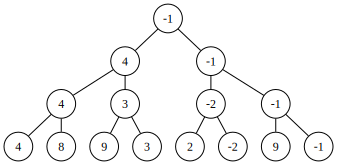

In [6]:
# In this case, the minimax algorithm will return the following result:

print(minimax(root, False))
root.draw_tree(False)

While the minimax algorithm is a powerful strategy for game analysis, it may face limitations when applied to real-world problems with a high branching factor, such as 10, and a game tree height of 16. 

To put this into perspective, evaluating situations in such a scenario would require processing a staggering 10^16 nodes. Even with a high-performance computer capable of evaluating one million nodes per second, the computational task would extend over a daunting 10^10 seconds, equivalent to several hundred years.

This immense computational demand highlights the need for more efficient algorithms and heuristics to tackle complex problems with substantial branching factors and deep game trees.

FYI, in the game of chess, the typical branching factor, representing the number of possible moves in a given position, is approximately 14. Skilled chess players, including world chess masters, often possess the ability to think ahead by as many as 15 moves, allowing them to plan and strategize several steps into the future.

### 2. Alpha-beta pruning algorithm

(8, [0, 0, 1])


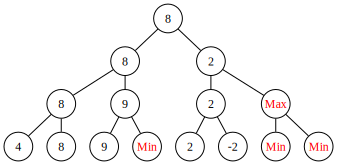

In [7]:
root = build_bin_tree(list1)
print(alpha_beta_pruning(root, True))
root.draw_tree()

Nodes within pruned branches do not require evaluation, conserving computational resources. These nodes are labeled as 'Max' for maximizing nodes and 'Min' for minimizing nodes. Additionally, they are visually represented in red.

Allow me to clarify why there's no need to evaluate node 011. Node 0 functions as a minimizing node and will be assigned the minimum of 8 and the value of node 01, which is yet to be determined. Once we ascertain that the value of node 010 is 9, it becomes evident that node 01, a maximizing node, will be assigned a value greater than or equal to 9. Consequently, we can conclusively determine that node 0 will be assigned the value 8 without requiring knowledge of the value at node 011. In other words, the evaluation of node 011 does not impact the outcome for node 0. This elucidates why there is no need to evaluate node 011.

At this point, I'm confident that you can explain why there's no need to evaluate node 11 without much difficulty.

This concept can be incorporated to develop an algorithm for systematically identifying the nodes that do not require evaluation.

Throughout the computation, two values, `alpha` and `beta`, are employed to represent the guaranteed minimum score for the maximizing player and the guaranteed maximum score for the minimizing player, respectively. Initially, `alpha` is set to negative infinity, and `beta` is initialized to positive infinity. One could say that both players start with their worst possible scores.

Maximizing node updates `alpha` (from elder children) while minimizing node updates `beta` (from elder children too). These values are passed to the younger children to determine whether further search is necessary.

As an maximizer node evaluates its child nodes, if it discovers a node whose value exceeds or equals the `beta` threshold, there is no necessity to explore its younger siblings. This is because the maximizer's parent node is a minimizer and thus it will not use the current node's value. Further search can only make the value of this maximizer node larger and won't be used the minimizer parent anyway. 

Likewise, when the minimizer assesses its child nodes and finds a node whose value is less than or equal to the `alpha` threshold, there is no need to delve deeper into the descendants of that node, as they too will not affect the course of the game.

In the above example, we observed that we saved 4 out of a total of 15 nodes. Well this doesn't look like an impressive result. What's more, in the next example where the minimizer makes the first move, there are no pruned branches at all! Such a poor result was obtained because our game tree was tiny.

(-1, [1, 1, 1])


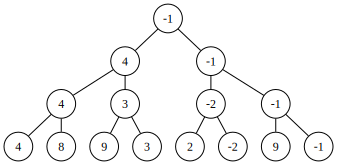

In [8]:
root = build_bin_tree(list1)
print(alpha_beta_pruning(root, False))
root.draw_tree(False) # no pruning occurs in this case

The computation time for the minimax algorithm can be readily understood as being in $O(b^d)$, where $b$ represents the branching factor and $d$ denotes the search depth.

It is known that the computation time for the alpha-beta pruning algorithm is typically in $O(b^{d/2})$ on average. As an example, when $b = 10$ and $d = 20$, the computation time decreases by a factor of 10 billion!

### 3. More examples

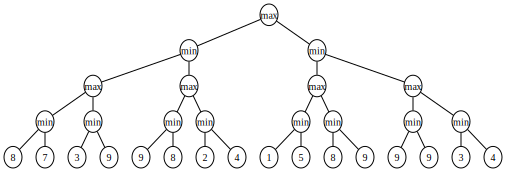

In [9]:
list2 = [8, 7, 3, 9, 9, 8, 2, 4, 1, 5, 8, 9, 9, 9, 3, 4]
root_2 = build_bin_tree(list2)
root_2.draw_tree(True)

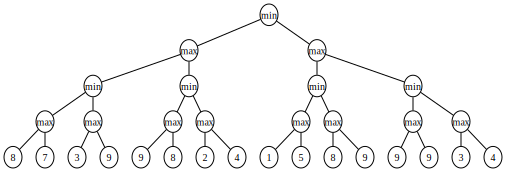

In [10]:
root_2.draw_tree(False)

(8, [1, 0, 1, 0])


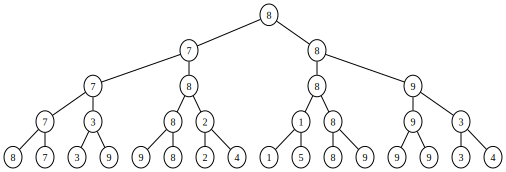

In [11]:
print(minimax(root_2, True))
root_2.draw_tree()

(5, [1, 0, 0, 1])


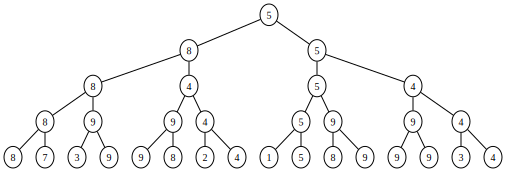

In [12]:
root_2 = build_bin_tree(list2)
print(minimax(root_2, False))
root_2.draw_tree(False)

(8, [1, 0, 1, 0])


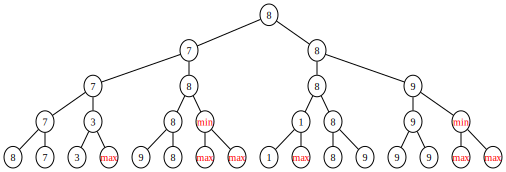

In [13]:
root_2 = build_bin_tree(list2)
print(alpha_beta_pruning(root_2, True))
root_2.draw_tree(True)

(5, [1, 0, 0, 1])


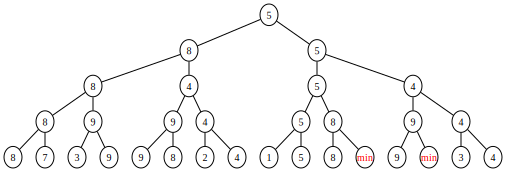

In [14]:
root_2 = build_bin_tree(list2)
print(alpha_beta_pruning(root_2, False))
root_2.draw_tree(False)

### 4. Text output

Old code used when the graphic tree output was not available.

In [15]:
# maximizer plays first
root = build_bin_tree(list1)
max_depth = 3
ret_tuple = minimax(root, True)
pprint(ret_tuple) # shows the value of the maximized end node and the path to it
print()
print(root) # all nodes are evaluated and labeled with their values
print(root.build_str())


(8, [0, 0, 1])

[] 8
[0] 8
[00] 8
[000] 4
[001] 8
[01] 9
[010] 9
[011] 3
[1] 2
[10] 2
[100] 2
[101] -2
[11] 9
[110] 9
[111] -1

[] 8
[0] 8
[00] 8
[000] 4
[001] 8
[01] 9
[010] 9
[011] 3
[1] 2
[10] 2
[100] 2
[101] -2
[11] 9
[110] 9
[111] -1



In [16]:
# minimizer plays first
node = build_bin_tree([4, 8, 9, 3, 2, -2, 9, -1])
print(node) # same as before
ret_tuple = minimax(node, False) 
pprint(ret_tuple) # different from before
print()
print(node) # different from before

[] None
[0] None
[00] None
[000] 4
[001] 8
[01] None
[010] 9
[011] 3
[1] None
[10] None
[100] 2
[101] -2
[11] None
[110] 9
[111] -1

(-1, [1, 1, 1])

[] -1
[0] 4
[00] 4
[000] 4
[001] 8
[01] 3
[010] 9
[011] 3
[1] -1
[10] -2
[100] 2
[101] -2
[11] -1
[110] 9
[111] -1



In [17]:
list2 = [8, 7, 3, 9, 9, 8, 2, 4, 1, 5, 8, 9, 9, 9, 3, 4]
root_2 = build_bin_tree(list2)
print(root_2)

[] None
[0] None
[00] None
[000] None
[0000] 8
[0001] 7
[001] None
[0010] 3
[0011] 9
[01] None
[010] None
[0100] 9
[0101] 8
[011] None
[0110] 2
[0111] 4
[1] None
[10] None
[100] None
[1000] 1
[1001] 5
[101] None
[1010] 8
[1011] 9
[11] None
[110] None
[1100] 9
[1101] 9
[111] None
[1110] 3
[1111] 4



In [18]:
# maximizer plays first
pprint(minimax(root_2, True))
print()
print(root_2)

(8, [1, 0, 1, 0])

[] 8
[0] 7
[00] 7
[000] 7
[0000] 8
[0001] 7
[001] 3
[0010] 3
[0011] 9
[01] 8
[010] 8
[0100] 9
[0101] 8
[011] 2
[0110] 2
[0111] 4
[1] 8
[10] 8
[100] 1
[1000] 1
[1001] 5
[101] 8
[1010] 8
[1011] 9
[11] 9
[110] 9
[1100] 9
[1101] 9
[111] 3
[1110] 3
[1111] 4



In [19]:
# minimizer plays first
root_2 = build_bin_tree(list2)
print(root_2)
pprint(minimax(root_2, False))
print()
print(root_2)

[] None
[0] None
[00] None
[000] None
[0000] 8
[0001] 7
[001] None
[0010] 3
[0011] 9
[01] None
[010] None
[0100] 9
[0101] 8
[011] None
[0110] 2
[0111] 4
[1] None
[10] None
[100] None
[1000] 1
[1001] 5
[101] None
[1010] 8
[1011] 9
[11] None
[110] None
[1100] 9
[1101] 9
[111] None
[1110] 3
[1111] 4

(5, [1, 0, 0, 1])

[] 5
[0] 8
[00] 8
[000] 8
[0000] 8
[0001] 7
[001] 9
[0010] 3
[0011] 9
[01] 4
[010] 9
[0100] 9
[0101] 8
[011] 4
[0110] 2
[0111] 4
[1] 5
[10] 5
[100] 5
[1000] 1
[1001] 5
[101] 9
[1010] 8
[1011] 9
[11] 4
[110] 9
[1100] 9
[1101] 9
[111] 4
[1110] 3
[1111] 4



In [20]:
# Now, alpha-beta pruning.
# Maximizer plays first.

root = build_bin_tree(list1)
max_depth = 3
ret_tuple = alpha_beta_pruning(root, True)
pprint(ret_tuple)
print()
print(root)
print(root.build_str()) # shows the effect of pruning clearly

(8, [0, 0, 1])

[] 8
[0] 8
[00] 8
[000] 4
[001] 8
[01] 9
[010] 9
[011] 3
[1] 2
[10] 2
[100] 2
[101] -2
[11] None
[110] 9
[111] -1

[] 8
[0] 8
[00] 8
[000] 4
[001] 8
[01] 9
[010] 9
[011] unevaluated
[1] 2
[10] 2
[100] 2
[101] -2
[11] unevaluated



In [21]:
# Now, alpha-beta pruning.
# Minimizer plays first.

root = build_bin_tree(list1)
max_depth = 3
ret_tuple = alpha_beta_pruning(root, False)
pprint(ret_tuple)
print()
print(root)
print(root.build_str()) # shows the effect of pruning clearly

(-1, [1, 1, 1])

[] -1
[0] 4
[00] 4
[000] 4
[001] 8
[01] 3
[010] 9
[011] 3
[1] -1
[10] -2
[100] 2
[101] -2
[11] -1
[110] 9
[111] -1

[] -1
[0] 4
[00] 4
[000] 4
[001] 8
[01] 3
[010] 9
[011] 3
[1] -1
[10] -2
[100] 2
[101] -2
[11] -1
[110] 9
[111] -1



In [22]:
# Now, alpha-beta pruning.
# Maximizer plays first.
root_2 = build_bin_tree(list2)
pprint(alpha_beta_pruning(root_2,  True))
print()
print(root_2)
print(root_2.build_str()) # shows the effect of pruning clearly

(8, [1, 0, 1, 0])

[] 8
[0] 7
[00] 7
[000] 7
[0000] 8
[0001] 7
[001] 3
[0010] 3
[0011] 9
[01] 8
[010] 8
[0100] 9
[0101] 8
[011] None
[0110] 2
[0111] 4
[1] 8
[10] 8
[100] 1
[1000] 1
[1001] 5
[101] 8
[1010] 8
[1011] 9
[11] 9
[110] 9
[1100] 9
[1101] 9
[111] None
[1110] 3
[1111] 4

[] 8
[0] 7
[00] 7
[000] 7
[0000] 8
[0001] 7
[001] 3
[0010] 3
[0011] unevaluated
[01] 8
[010] 8
[0100] 9
[0101] 8
[011] unevaluated
[1] 8
[10] 8
[100] 1
[1000] 1
[1001] unevaluated
[101] 8
[1010] 8
[1011] 9
[11] 9
[110] 9
[1100] 9
[1101] 9
[111] unevaluated



In [23]:
# Now, alpha-beta pruning.
# Maximizer plays first.
root_2 = build_bin_tree(list2)
pprint(alpha_beta_pruning(root_2, False))
print()
print(root_2)
print(root_2.build_str()) # shows the effect of pruning clearly

(5, [1, 0, 0, 1])

[] 5
[0] 8
[00] 8
[000] 8
[0000] 8
[0001] 7
[001] 9
[0010] 3
[0011] 9
[01] 4
[010] 9
[0100] 9
[0101] 8
[011] 4
[0110] 2
[0111] 4
[1] 5
[10] 5
[100] 5
[1000] 1
[1001] 5
[101] 8
[1010] 8
[1011] 9
[11] 4
[110] 9
[1100] 9
[1101] 9
[111] 4
[1110] 3
[1111] 4

[] 5
[0] 8
[00] 8
[000] 8
[0000] 8
[0001] 7
[001] 9
[0010] 3
[0011] 9
[01] 4
[010] 9
[0100] 9
[0101] 8
[011] 4
[0110] 2
[0111] 4
[1] 5
[10] 5
[100] 5
[1000] 1
[1001] 5
[101] 8
[1010] 8
[1011] unevaluated
[11] 4
[110] 9
[1100] 9
[1101] unevaluated
[111] 4
[1110] 3
[1111] 4



### 5. Non-binary tree example

The tree structure is fixed.  Only the values of the terminals can vary.

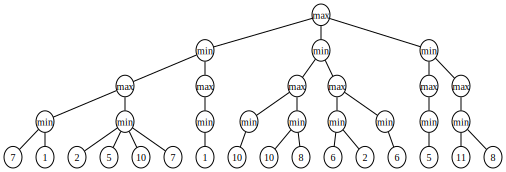

In [24]:
num_li = [random.randint(1, 11) for _ in range(16)]
root = build_my_tree(num_li)
root.draw_tree()

(6, [1, 1, 1, 0])


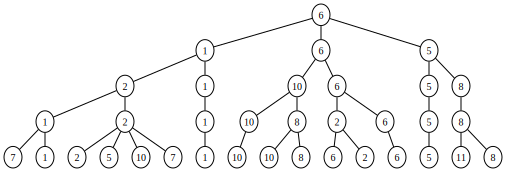

In [25]:
print(minimax(root, True))
root.draw_tree()

(6, [1, 1, 1, 0])


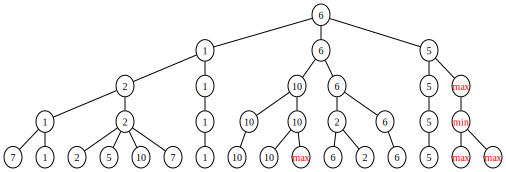

In [26]:
root = build_my_tree(num_li)
print(alpha_beta_pruning(root, True))
root.draw_tree()

(8, [0, 0, 0, 1])


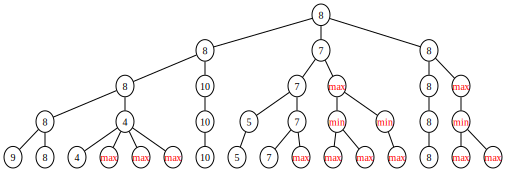

In [27]:
num_li = [9, 8, 4, 7, 4, 1, 10, 5, 7, 9, 11, 10, 3, 8, 7, 5]
root = build_my_tree(num_li)
print(alpha_beta_pruning(root, True))
root.draw_tree(True)

(5, [1, 0, 0, 0])


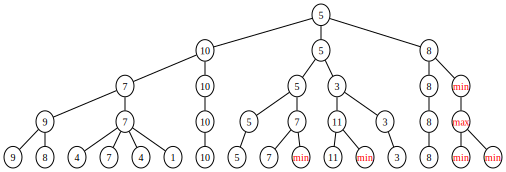

In [28]:
root = build_my_tree(num_li)
print(alpha_beta_pruning(root, False))
root.draw_tree(False)

### 6. Experiment with random trees

(5, [1, 0, 0, 0])


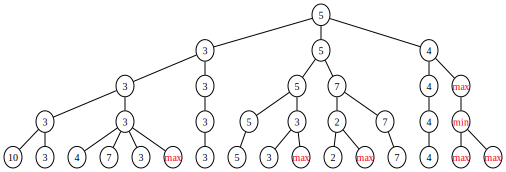

In [29]:
# You can repeat this random experiment as many times as you want.

root = build_my_tree()
print(alpha_beta_pruning(root, True))
root.draw_tree(True)

(5, [1, 1, 0, 0])


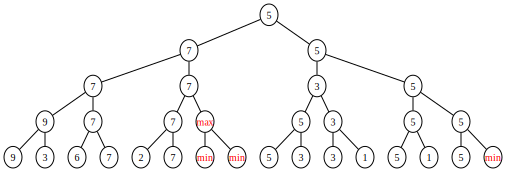

In [30]:
# You can repeat this random experiment as many times as you want.

root = build_bin_tree(4)
print(alpha_beta_pruning(root, False))
root.draw_tree(False)
